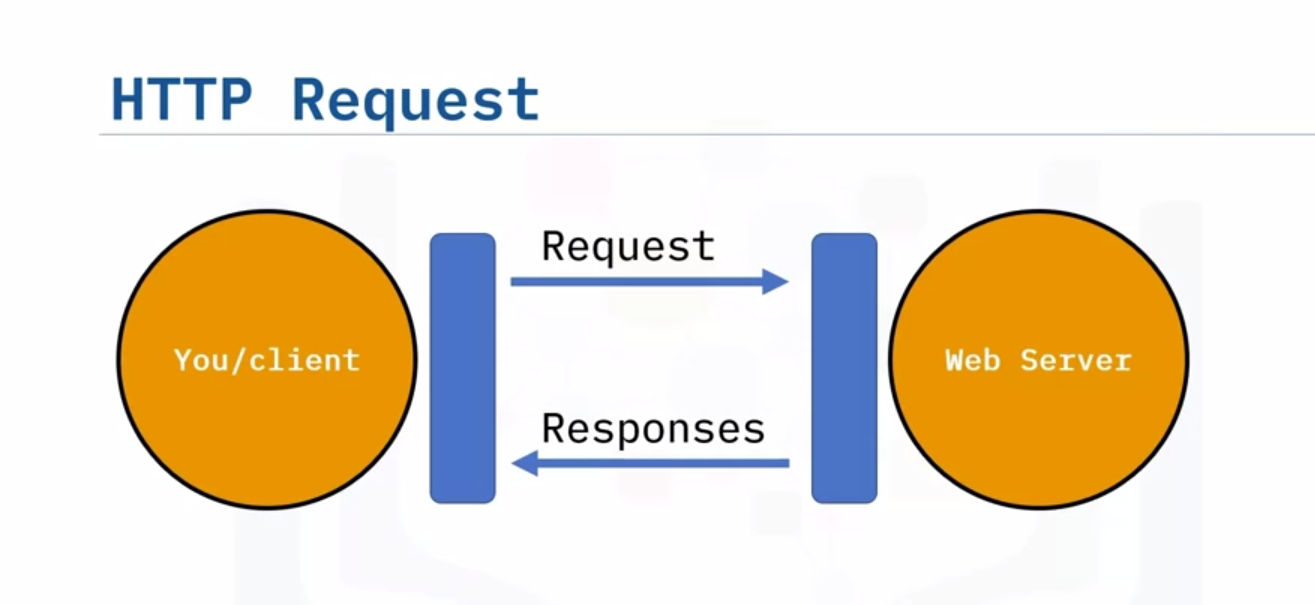

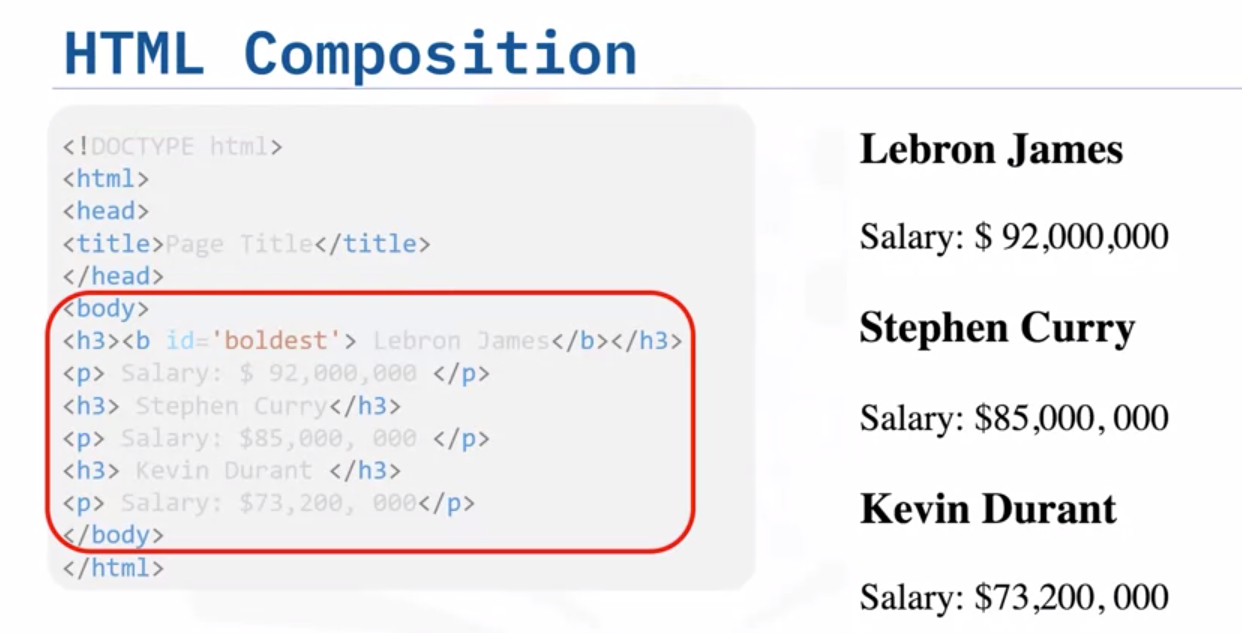

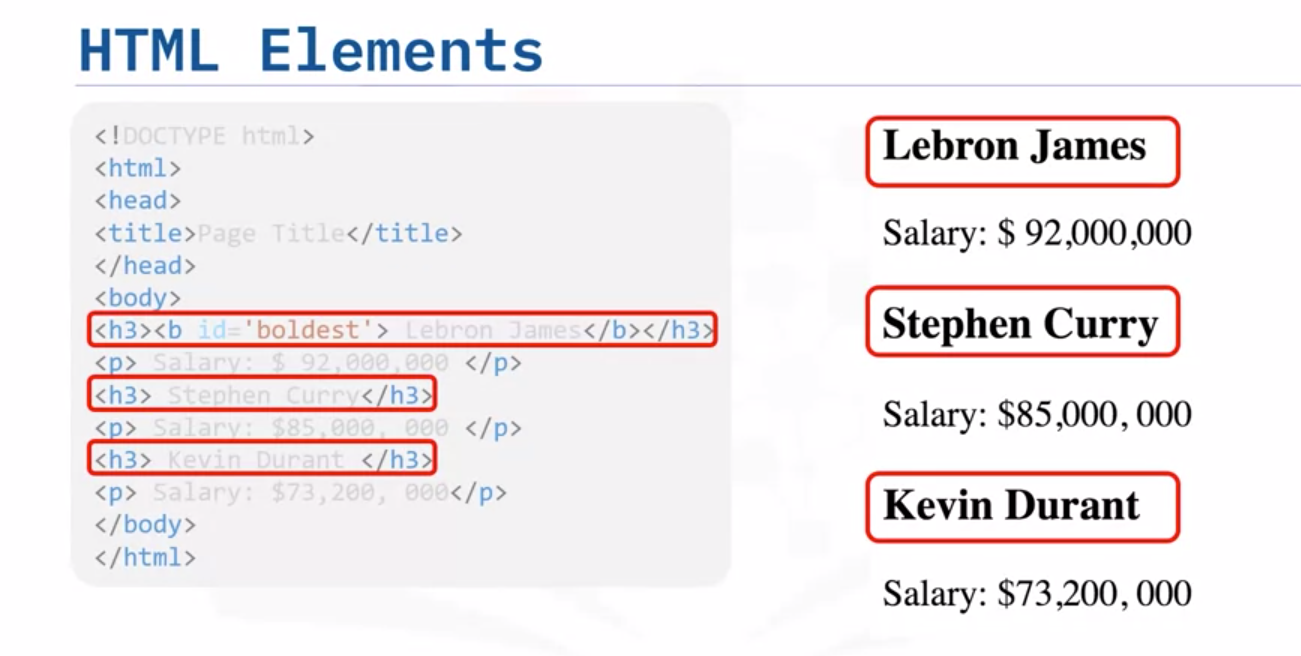

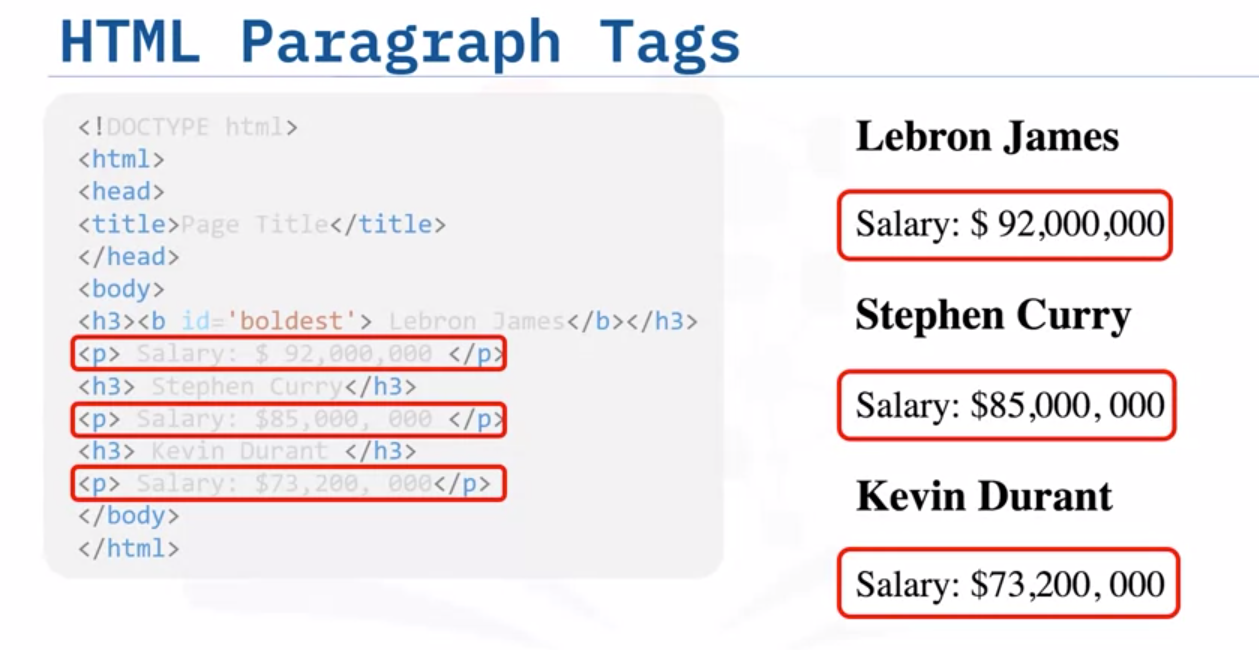

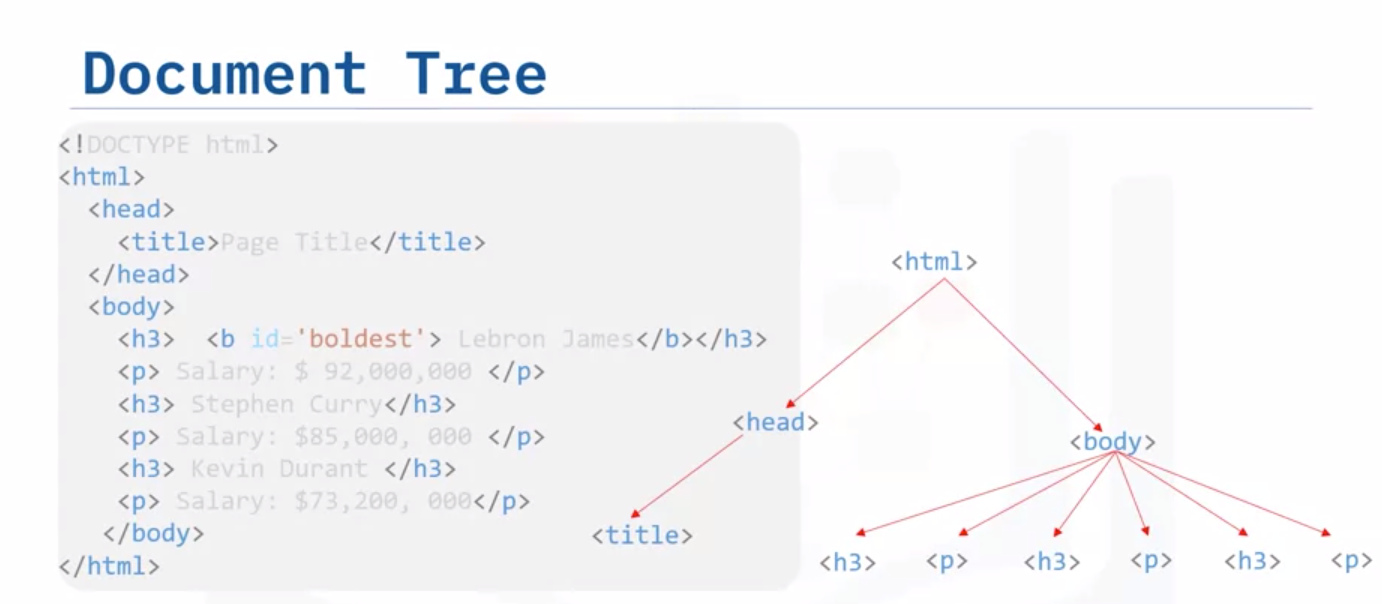

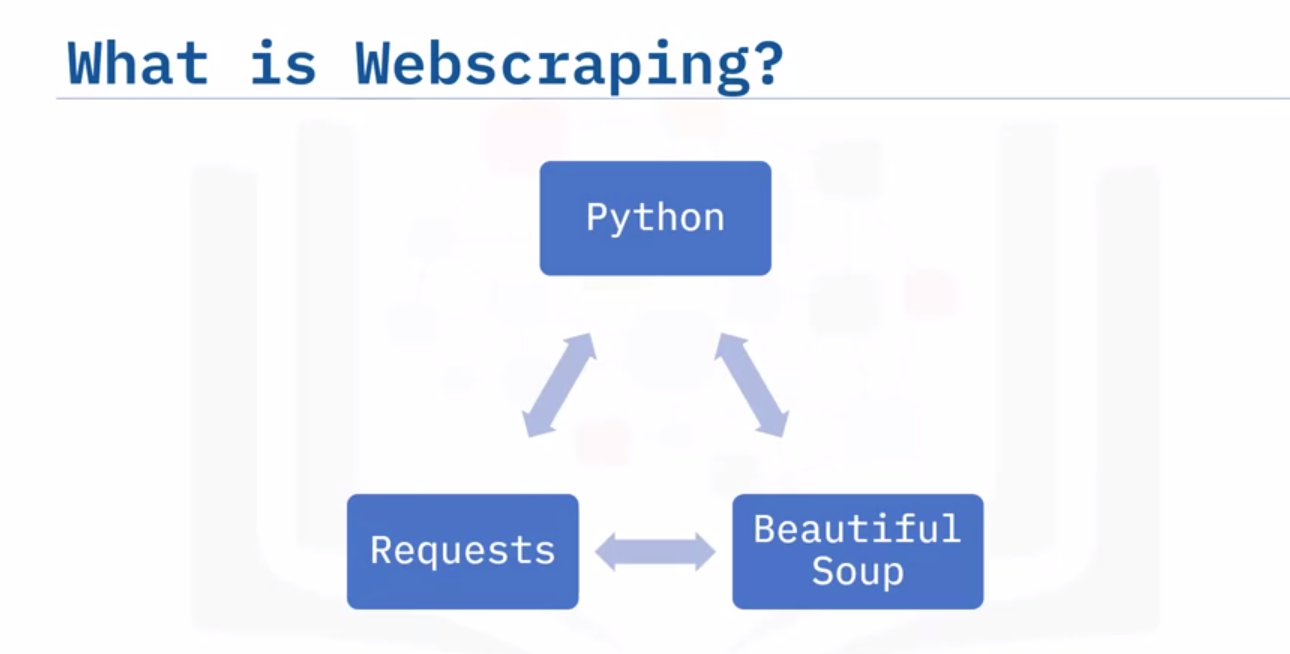

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
df=pd.DataFrame()
k = 24
for i in range(136):
    if i == 0:
        r = requests.get("https://www.century21.com/real-estate/chicago-il/LCILCHICAGO/?beds=1&baths=1&minsqft=200")
        c = r.content
        soup=BeautifulSoup(c, "html.parser")
        total = soup.find_all("div", {"class":"main-listings row row-cols-1 row-cols-md-2 row-cols-lg-3 row-cols-xxl-4 g-3 px-3 pe-sm-0 pb-3"})
        beds=total[0].find_all("div",{"class":"property-spec beds"})
        for i in range(0,len(beds)):
            beds[i]=int(beds[i].text.split()[0])
            
        prices=total[0].find_all("div",{"class":"font-family-taglines property-price"})
        for i in range(0,len(prices)):
            if prices[i].text.strip() == "Price On Request":
                prices[i] = 0
            else:
                prices[i]=int(prices[i].text.strip().replace(",","").replace("$",""))
            
        bath=total[0].find_all("span",{"class":"specs-number full-baths"})
        for i in range(0 , len(bath)):
            bath[i] = int(bath[i].text.strip())
            
        sqft=total[0].find_all("div",{"class":"property-spec square-footage"})
        for i in range(0 , len(sqft)):
            sqft[i] = int(sqft[i].text.split()[0].replace("," , ""))
            
        address=total[0].find_all("p",{"class":"property-address"})
        for i in range(0 , len(address)):
            address[i] = address[i].text.strip().replace("\n" , "")
            
        data={"bed rooms":beds,"baths":bath,"square feet":sqft,"address":address,"price":prices}
        dfs = pd.DataFrame(data)
        df = pd.concat([df, dfs], ignore_index=True)
    else:
        sub = "&s=" + str(k)
        r = requests.get("https://www.century21.com/real-estate/chicago-il/LCILCHICAGO/?beds=1&baths=1&minsqft=200" + sub)
        c = r.content
        k += 24
        soup=BeautifulSoup(c, "html.parser")
        total = soup.find_all("div", {"class":"main-listings row row-cols-1 row-cols-md-2 row-cols-lg-3 row-cols-xxl-4 g-3 px-3 pe-sm-0 pb-3"})
        
        beds=total[0].find_all("div",{"class":"property-spec beds"})
        for i in range(0,len(beds)):
            beds[i]=int(beds[i].text.split()[0])
            
        prices=total[0].find_all("div",{"class":"font-family-taglines property-price"})
        for i in range(0,len(prices)):
            if prices[i].text.strip() == "Price On Request":
                prices[i] = 0
            else:
                prices[i]=int(prices[i].text.strip().replace(",","").replace("$",""))
 
        bath=total[0].find_all("span",{"class":"specs-number full-baths"})
        for i in range(0 , len(bath)):
            bath[i] = int(bath[i].text.strip())
            
        sqft=total[0].find_all("div",{"class":"property-spec square-footage"})
        for i in range(0 , len(sqft)):
            sqft[i] = int(sqft[i].text.split()[0].replace("," , ""))

        address=total[0].find_all("p",{"class":"property-address"})
        for i in range(0 , len(address)):
            address[i] = address[i].text.strip().replace("\n" , "")
            
        data={"bed rooms":beds,"baths":bath,"square feet":sqft,"address":address,"price":prices}
        dfs = pd.DataFrame(data)
        df = pd.concat([df, dfs], ignore_index=True)
    

# Final View Of Data

In [3]:
df.head()

,bed rooms,baths,square feet,address,price
0,1,1,647,"7021 N Greenview Avenue , G Chicago, IL 60626",155000
1,2,2,1380,"520 W Huron Street Unit 320 Chicago, IL 60654",545000
2,3,2,1400,"7611 W Bloomingdale Avenue Elmwood Park, IL 60707",418900
3,6,3,2113,"9412 S Eberhart Avenue Chicago, IL 60619",335000
4,2,2,1150,"1540 N State Parkway Unit 11A Chicago, IL 60610",334500


In [4]:
df.shape

(3264, 5)

# Drop Houses With No Prices

In [5]:
df_0 = df[df["price"] == 0].index
print(df_0)
df = df.drop(df_0 , axis = 0)

Index([147, 617, 675, 2019, 2046, 2398, 2626, 2696, 2697, 2807, 3102, 3111,
       3252, 3254],
      dtype='int64')


In [6]:
df.shape

(3250, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3250 entries, 0 to 3263
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   bed rooms    3250 non-null   int64 
 1   baths        3250 non-null   int64 
 2   square feet  3250 non-null   int64 
 3   address      3250 non-null   object
 4   price        3250 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 152.3+ KB


In [8]:
df.describe()

,bed rooms,baths,square feet,price
count,3250.000000,3250.000000,3250.000000,3.250000e+03
mean,2.888923,2.009538,1828.043692,5.780239e+05
std,1.195418,0.919791,1195.947417,8.294966e+05
min,1.000000,1.000000,372.000000,1.825000e+03
25%,2.000000,1.000000,1100.000000,2.390000e+05
50%,3.000000,2.000000,1450.000000,3.490000e+05
75%,4.000000,2.000000,2200.000000,5.796750e+05
max,11.000000,8.000000,15000.000000,1.500000e+07


In [9]:
df.to_csv("Chicago.csv" , index = False)

# Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Exploration (EDA)

In [11]:
chi_data = pd.read_csv("Chicago.csv")
chi_data.head()

,bed rooms,baths,square feet,address,price
0,1,1,647,"7021 N Greenview Avenue , G Chicago, IL 60626",155000
1,2,2,1380,"520 W Huron Street Unit 320 Chicago, IL 60654",545000
2,3,2,1400,"7611 W Bloomingdale Avenue Elmwood Park, IL 60707",418900
3,6,3,2113,"9412 S Eberhart Avenue Chicago, IL 60619",335000
4,2,2,1150,"1540 N State Parkway Unit 11A Chicago, IL 60610",334500


In [12]:
chi_data.describe()

,bed rooms,baths,square feet,price
count,3250.000000,3250.000000,3250.000000,3.250000e+03
mean,2.888923,2.009538,1828.043692,5.780239e+05
std,1.195418,0.919791,1195.947417,8.294966e+05
min,1.000000,1.000000,372.000000,1.825000e+03
25%,2.000000,1.000000,1100.000000,2.390000e+05
50%,3.000000,2.000000,1450.000000,3.490000e+05
75%,4.000000,2.000000,2200.000000,5.796750e+05
max,11.000000,8.000000,15000.000000,1.500000e+07


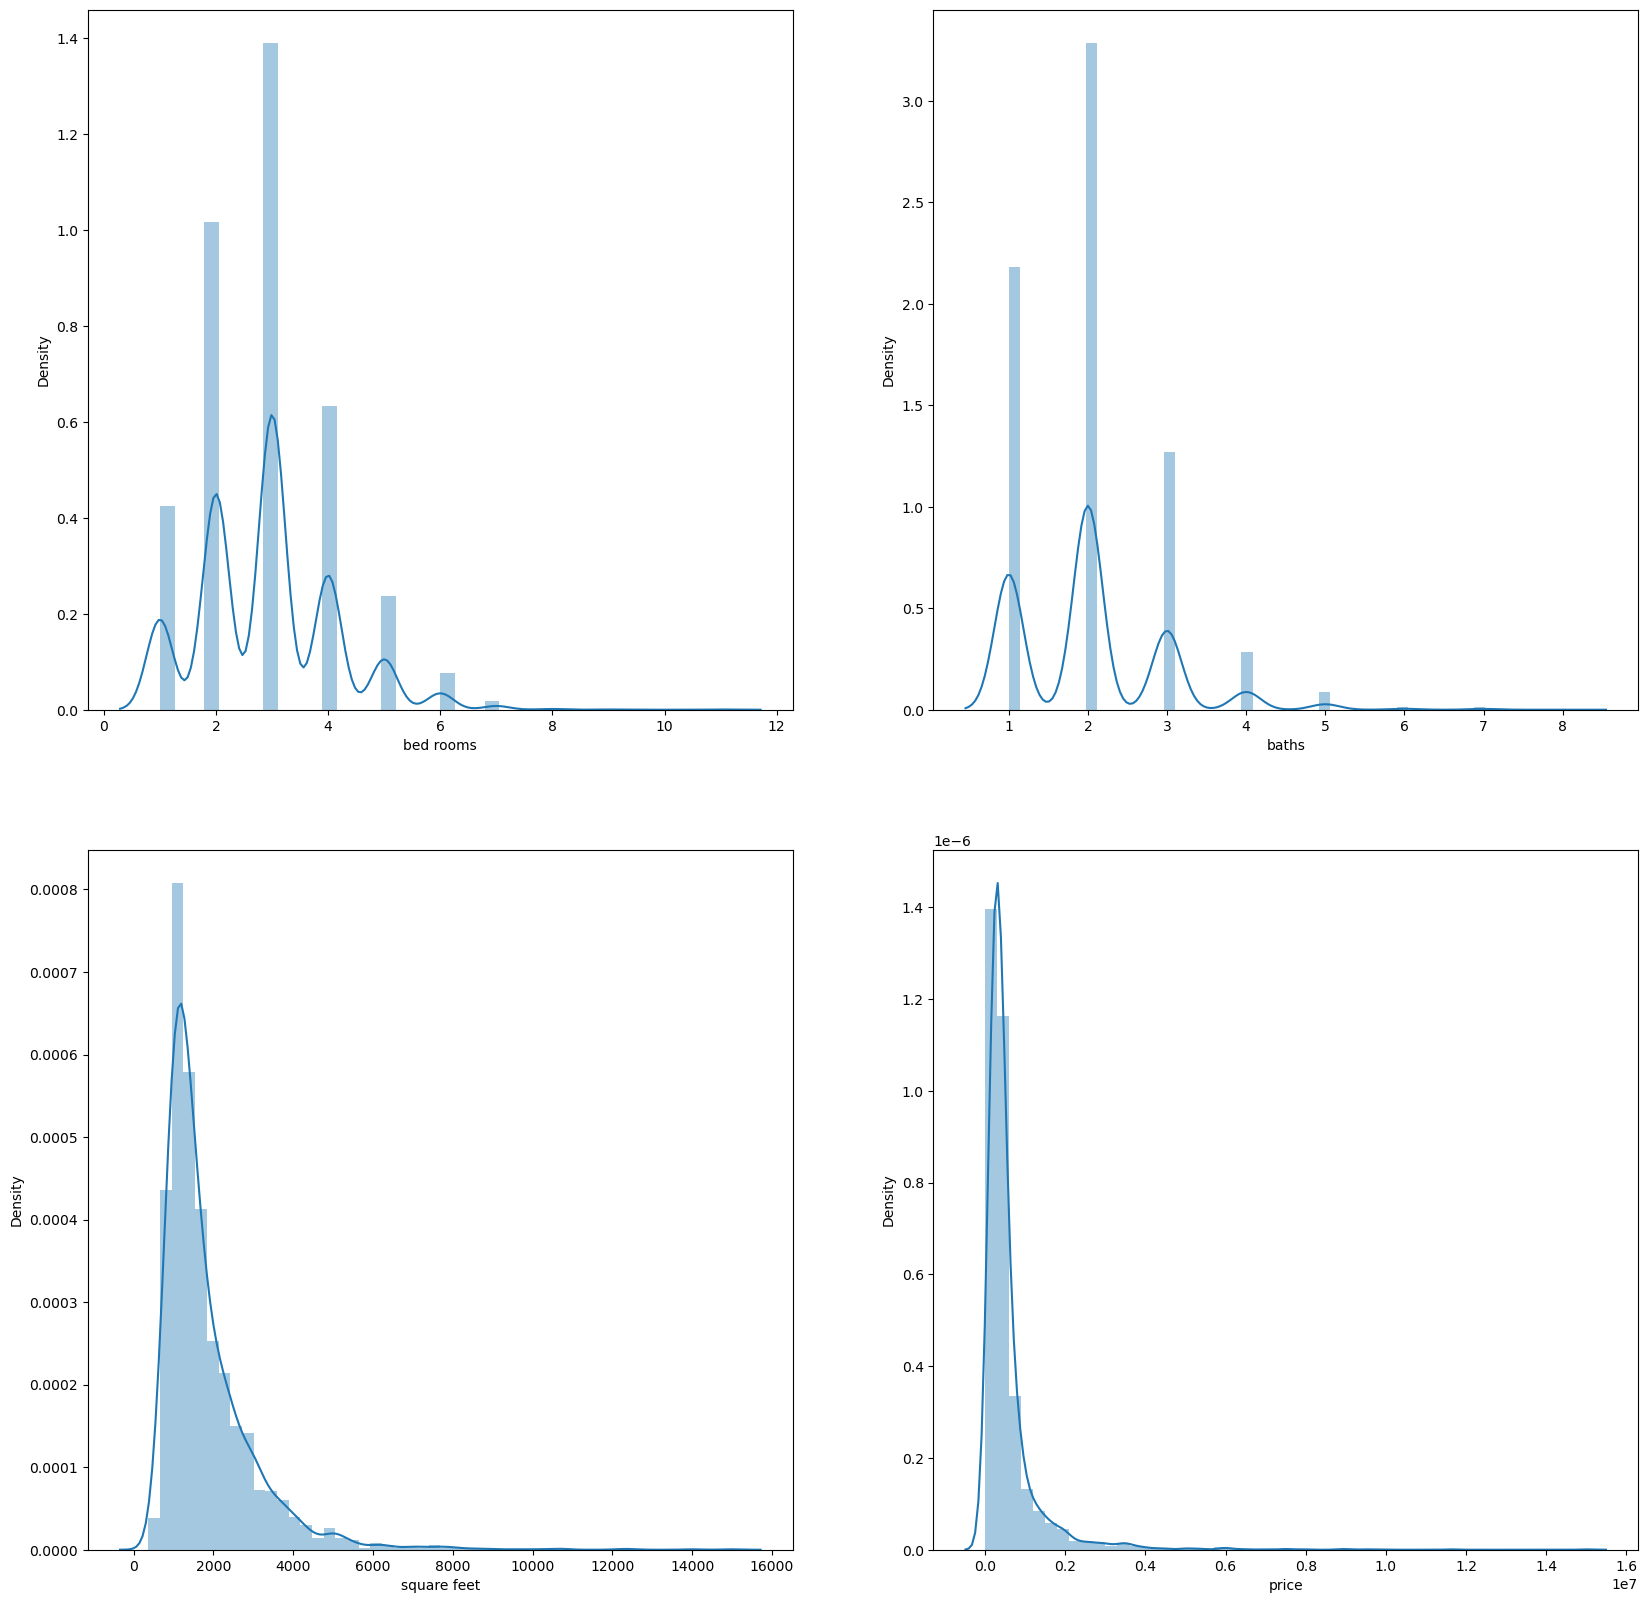

In [13]:
num = chi_data.select_dtypes(include = ["int64"])
plt.figure(figsize = [20,20])

for i , col in enumerate(num.columns):
    plt.subplot(2 , 2 , i + 1)
    sns.distplot(chi_data[col]);

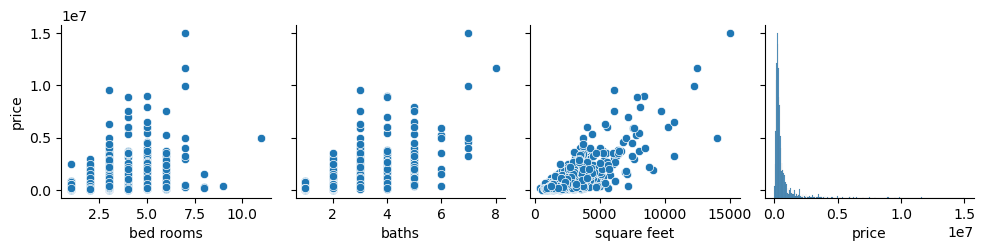

In [14]:
for i in range(0 , len(num.columns) , 4):
    sns.pairplot(data = num , x_vars = num.columns[i:i + 5] , y_vars = ["price"]);

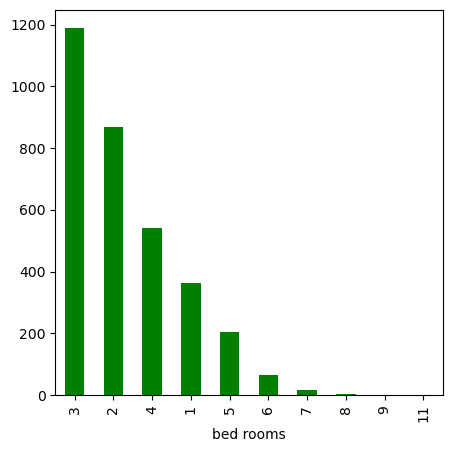

In [15]:
r = chi_data["bed rooms"].value_counts()
r.plot(kind = "bar" , figsize = [5,5] , color = "green");

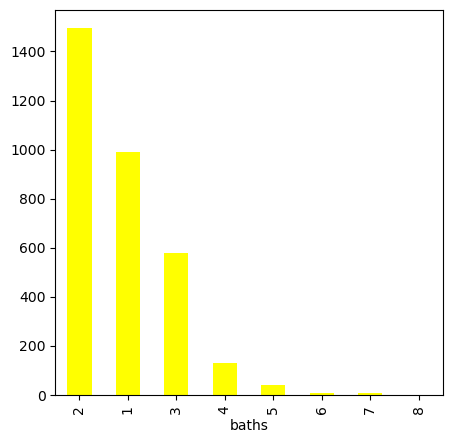

In [16]:
b = chi_data["baths"].value_counts()
b.plot(kind = "bar" , figsize = [5,5] , color = "yellow");

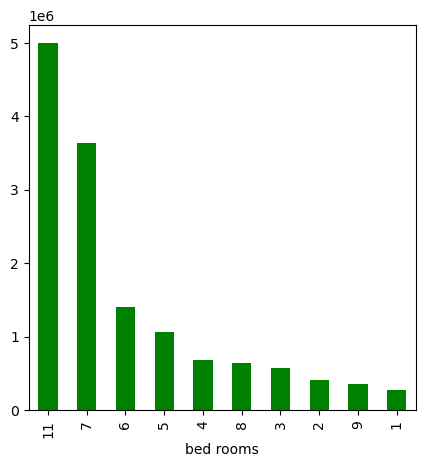

In [17]:
gr = chi_data.groupby(chi_data["bed rooms"])["price"].mean().sort_values(ascending = False)
gr.plot(kind = "bar" , figsize = [5,5] , color = "green");

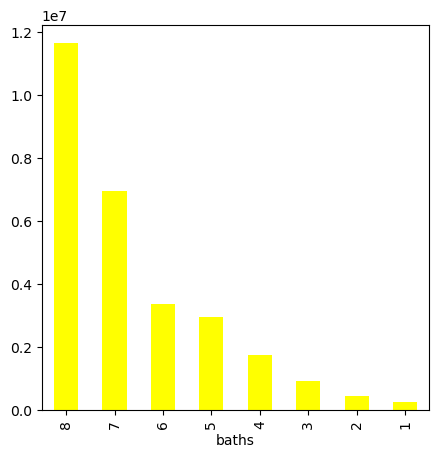

In [18]:
gb = chi_data.groupby(chi_data["baths"])["price"].mean().sort_values(ascending = False)
gb.plot(kind = "bar" , figsize = [5,5] , color = "yellow");